# Australia - Temperature vs New Cases

In [150]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Find average new cases per month 

In [151]:
#Read in Aus Dataframe
aus_df = pd.read_csv("Resources/australia_df.csv")

#Filter dataframe for info needed
aus_date=aus_df[["date", "new_cases"]]

#Create column with months 
month=pd.DataFrame(index=range(0,275), columns=["Month"], dtype='float')
month.iloc[1:32]="1"
month.iloc[32:61]="2"
month.iloc[61:92]="3"
month.iloc[92:122]="4"
month.iloc[122:153]="5"
month.iloc[153:183]="6"
month.iloc[183:214]="7"
month.iloc[214:245]="8"
month.iloc[245:275]="9"

#Add column to dataframe
aus_date["Month"]=month

#Groupby month to get monthly average
aus_av_cases=aus_date.groupby(["Month"]).mean()
aus_av_cases.sort_values(by="Month", ascending=True)


,new_cases
Month,
1,0.225806
2,0.620690
3,146.193548
4,72.966667
5,14.161290
6,19.400000
7,275.354839
8,302.161290
9,46.433333


## Find average temperature per month 

In [156]:
#Read in Aus temperature history
aus_temp = pd.read_csv("Resources/Canberra_HistoricalData.csv")

#Filter to get monthly average temperature 
aus_av_temp=aus_temp.iloc[38,1:10]
aus_av_temp=pd.DataFrame(aus_av_temp)
aus_av_temp.columns=["Temp"]
aus_av_temp.index=aus_av_cases.index
aus_av_temp

,Temp
Month,
1,30.8
2,28.2
3,25.2
4,21.0
5,16.6
6,13.4
7,12.8
8,14.0
9,18.1


## Plot line graph 

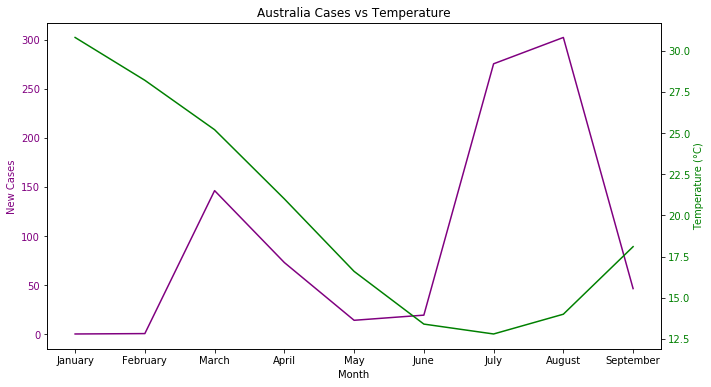

In [180]:
#Define axis
x_axis=np.arange(0,9,1)
y_axis1=aus_av_cases["new_cases"]
y_axis2=aus_av_temp["Temp"]
y_axis2=y_axis2.astype(float)
labels=["January", "February", "March", "April", "May", "June", "July", "August", "September"]

#Plot & format line 1
fig, ax1=plt.subplots(figsize=(11,6))
ax1.plot(x_axis, y_axis1, color="purple")
ax1.set_xlabel("Month")
ax1.set_ylabel("New Cases", color="purple")
ax1.tick_params(axis='y', labelcolor="purple")

#Plot & format line 2
ax2=ax1.twinx()
ax2.plot(x_axis, y_axis2, color="green")
ax2.set_ylabel("Temperature (°C)", color="green")
ax2.tick_params(axis='y', labelcolor="green")

#Add tick labels 
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, labels, rotation="vertical")

#Add title and labels
plt.title("Australia Cases vs Temperature")

#Save figure
plt.savefig("Australia")